In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("prediction_df.csv")
df = df.iloc[:, 1:]
df = df[df['inning']==1]
df.head()

,id,inning,batting_team,toss_winner,toss_decision,city,winner,last_over,wickets,cum_score_6,fall_wickets_6,final_20,team_match_count,final_avg,batting_avg,run_rate_6
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,field,Hyderabad,Sunrisers Hyderabad,17,4,59,1,207,1,0.0,161.263158,8.500000
4,5,1,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Bengaluru,Royal Challengers Bangalore,9,8,41,2,157,1,0.0,165.119048,8.035714
8,9,1,Delhi Daredevils,Rising Pune Supergiants,field,Pune,Delhi Daredevils,15,4,62,1,205,1,0.0,163.833333,8.255051
13,14,1,Kolkata Knight Riders,Sunrisers Hyderabad,field,Kolkata,Kolkata Knight Riders,7,6,40,2,172,1,177.5,159.032967,8.250916
14,15,1,Delhi Daredevils,Delhi Daredevils,bat,Delhi,Delhi Daredevils,8,6,49,0,188,1,205.0,163.833333,8.255051


In [ ]:

X = df.drop(columns=['id','toss_winner','toss_decision','winner','last_over','wickets','team_match_count','final_20','run_rate_6','batting_avg'])

X['final_avg'] = (X['final_avg'] - X['final_avg'].mean())/X['final_avg'].std()
X['cum_score_6'] = (X['cum_score_6'] - X['cum_score_6'].mean())/X['cum_score_6'].std()

X = pd.get_dummies(data=X, drop_first=False)
X.head()

,inning,cum_score_6,fall_wickets_6,final_avg,batting_team_Chennai Super Kings,batting_team_Deccan Chargers,batting_team_Delhi Capitals,batting_team_Delhi Daredevils,batting_team_Gujarat Lions,batting_team_Kings XI Punjab,batting_team_Kochi Tuskers Kerala,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,batting_team_Pune Warriors,batting_team_Rajasthan Royals,batting_team_Rising Pune Supergiants,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,city_Abu Dhabi,city_Ahmedabad,city_Bengaluru,city_Bloemfontein,city_Cape Town,city_Centurion,city_Chandigarh,city_Chennai,city_Cuttack,city_Delhi,city_Dharamsala,city_Durban,city_East London,city_Hyderabad,city_Indore,city_Jaipur,city_Johannesburg,city_Kimberley,city_Kochi,city_Kolkata,city_Mohali,city_Mumbai,city_Nagpur,city_Port Elizabeth,city_Pune,city_Raipur,city_Rajkot,city_Ranchi,city_Sharjah,city_Visakhapatnam
0,1,0.986210,1,-7.268071,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,-0.592459,2,-7.268071,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,1.249322,1,-7.268071,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
13,1,-0.680163,2,0.853465,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
14,1,0.109172,0,2.111731,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y = df['final_20']
Y.head()

0     207
4     157
8     205
13    172
14    188
Name: final_20, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=101)

## **Deep Neural Network Regression** 

In [ ]:
model = keras.Sequential([layers.Dense(64, activation='relu'),
                          layers.Dense(32, activation='relu'),
                          layers.Dense(32, activation='relu'),
                          layers.Dense(1)])

adam = tf.keras.optimizers.Adam(0.001)
model.compile(optimizer=adam, metrics=['mse'], loss="mae")

In [ ]:
history = model.fit(
    X_train,
    y_train,
    validation_split=0.15,
    verbose=1,
    epochs=200
)

Epoch 1/200
8/8 [==============================] - 1s 36ms/step - loss: 177.6102 - mse: 32305.3008 - val_loss: 172.9063 - val_mse: 30541.5938
Epoch 2/200
8/8 [==============================] - 0s 6ms/step - loss: 177.2182 - mse: 32167.6406 - val_loss: 172.4716 - val_mse: 30391.4238
Epoch 3/200
8/8 [==============================] - 0s 5ms/step - loss: 176.7453 - mse: 32000.8945 - val_loss: 171.9037 - val_mse: 30196.4297
Epoch 4/200
8/8 [==============================] - 0s 5ms/step - loss: 176.1119 - mse: 31777.3086 - val_loss: 171.1451 - val_mse: 29938.0293
Epoch 5/200
8/8 [==============================] - 0s 5ms/step - loss: 175.2429 - mse: 31473.5664 - val_loss: 170.0820 - val_mse: 29578.6719
Epoch 6/200
8/8 [==============================] - 0s 5ms/step - loss: 173.9965 - mse: 31041.5000 - val_loss: 168.5156 - val_mse: 29054.1133
Epoch 7/200
8/8 [==============================] - 0s 6ms/step - loss: 172.1615 - mse: 30410.3516 - val_loss: 166.1961 - val_mse: 28287.6445
Epoch 8/200


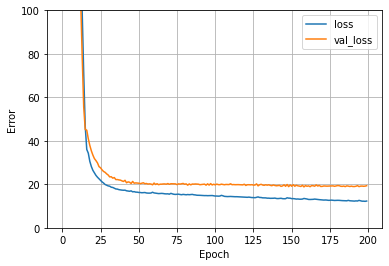

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 100])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [ ]:
model.evaluate(X_test, y_test, verbose=1)

2/2 [==============================] - 0s 5ms/step - loss: 18.2011 - mse: 549.7338


[18.201107025146484, 549.7337646484375]

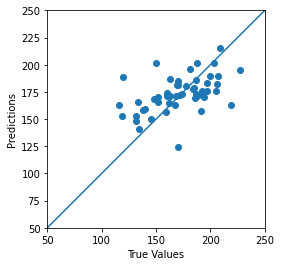

In [ ]:
test_predictions = model.predict(X_test).flatten()
plt.figure(figsize=(6,4))
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [50, 250]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
diff = test_predictions.flatten() - y_test
percentDiff = (diff / y_test) * 100
absPercentDiff = np.abs(percentDiff)
# compute the mean and standard deviation of the absolute percentage
# difference
mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)
print("mean : {:.2f}%, std: {:.2f}%".format(mean, std))

mean : 11.33%, std: 10.74%
